<a href="https://colab.research.google.com/github/anshuraj460016/AI-Lab/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

Round 1:
Participation Rate: 0.40, Fairness Metric: 0.0000
Resource Allocation: [0.22171056 0.         0.24700949 0.         0.26091063] (first 5 clients)

Round 2:
Participation Rate: 0.80, Fairness Metric: 0.0000
Resource Allocation: [0.13292598 0.11261114 0.1494227  0.1055894  0.15238444] (first 5 clients)

Round 3:
Participation Rate: 0.60, Fairness Metric: 0.0000
Resource Allocation: [0.12416764 0.08184029 0.13334449 0.12035103 0.1107456 ] (first 5 clients)

Round 4:
Participation Rate: 0.70, Fairness Metric: 0.0000
Resource Allocation: [0.10700213 0.10309213 0.12322004 0.12120081 0.11333536] (first 5 clients)

Round 5:
Participation Rate: 0.70, Fairness Metric: 0.0000
Resource Allocation: [0.11583044 0.09545999 0.12332588 0.12188168 0.11568409] (first 5 clients)

Round 6:
Participation Rate: 1.00, Fairness Metric: 0.0000
Resource Allocation: [0.10657158 0.09891658 0.10922556 0.10141346 0.10961029] (first 5 clients)

Round 7:
Participation Rate: 0.80, Fairness Metric: 0.0000
Resou

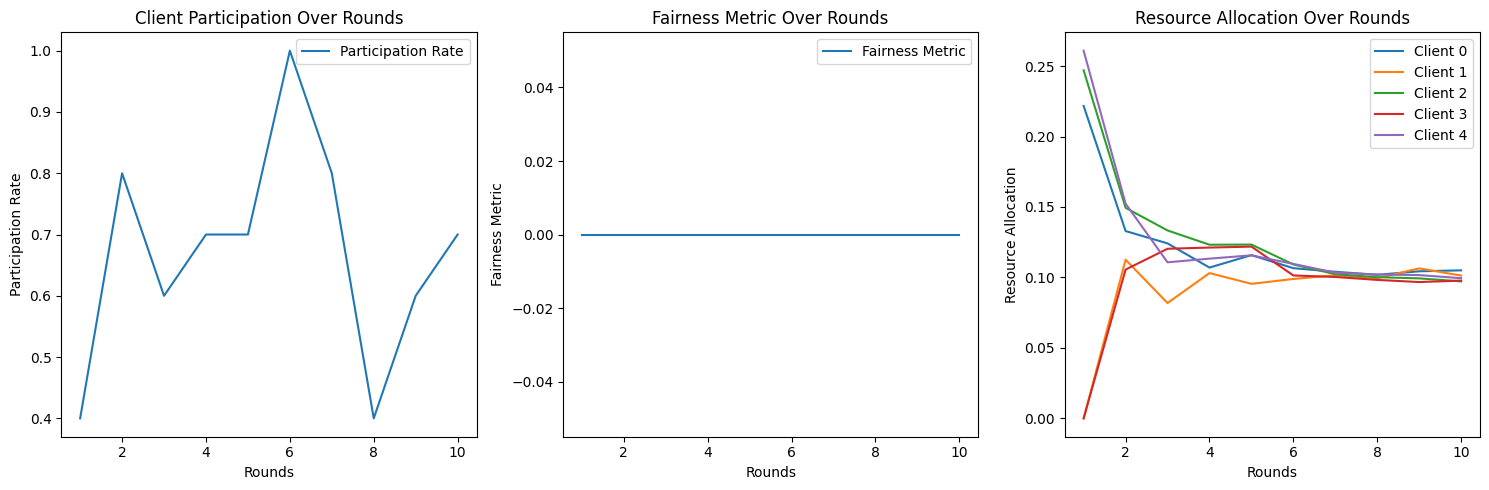

Federated Learning Completed.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_parameters(num_clients, num_csp, T_max, alpha, beta, p_thresh, d_avg):
    theta_global = np.random.rand(10)  # Example global model (10 parameters)
    client_reputation = np.zeros(num_clients)
    client_tokens = np.zeros(num_clients)
    local_datasets = [np.random.rand(d_avg, 10) for _ in range(num_clients)]
    return theta_global, client_reputation, client_tokens, local_datasets

def compute_local_update(client_id, theta):
    local_update = np.random.rand(10) * 0.1  # Simulated update
    return local_update

def evaluate_update_quality(update, theta):
    return np.dot(update, theta) / (np.linalg.norm(update) * np.linalg.norm(theta))  # Cosine similarity

def allocate_resources(reputations, tokens):
    total_reputation = np.sum(reputations)
    if total_reputation == 0:
        return np.zeros_like(reputations)
    return reputations / total_reputation  # Allocate proportionally based on reputation

def federated_learning(num_clients, T_max, alpha, beta, p_thresh, theta_global, client_reputation, client_tokens, local_datasets):
    participation_rates = []
    fairness_metrics = []
    resource_allocations = []

    for t in range(1, T_max + 1):
        print(f"Round {t}:")

        participation = []
        updates = []
        qualities = []

        for i in range(num_clients):
            participation_prob = np.random.rand()
            if participation_prob >= p_thresh:
                participation.append(i)
                local_update = compute_local_update(i, theta_global)
                quality = evaluate_update_quality(local_update, theta_global)
                updates.append(local_update)
                qualities.append(quality)

                client_reputation[i] = alpha * client_reputation[i] + (1 - alpha) * quality
                client_tokens[i] += beta * quality

        if updates:
            weights = np.array(qualities) / np.sum(qualities)
            updates = np.array(updates)
            theta_global = np.sum(weights[:, None] * updates, axis=0)

        resource_allocation = allocate_resources(client_reputation, client_tokens)
        participation_rate = len(participation) / num_clients
        fairness_metric = np.var(participation_rate) / np.mean(participation_rate) if np.mean(participation_rate) > 0 else 0

        print(f"Participation Rate: {participation_rate:.2f}, Fairness Metric: {fairness_metric:.4f}")
        print(f"Resource Allocation: {resource_allocation[:5]} (first 5 clients)\n")

        participation_rates.append(participation_rate)
        fairness_metrics.append(fairness_metric)
        resource_allocations.append(resource_allocation[:5])  # Collect only the first 5 clients for simplicity

    return theta_global, client_reputation, client_tokens, participation_rates, fairness_metrics, resource_allocations

def plot_metrics(T_max, participation_rates, fairness_metrics, resource_allocations):
    rounds = np.arange(1, T_max + 1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(rounds, participation_rates, label="Participation Rate")
    plt.xlabel("Rounds")
    plt.ylabel("Participation Rate")
    plt.title("Client Participation Over Rounds")
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(rounds, fairness_metrics, label="Fairness Metric")
    plt.xlabel("Rounds")
    plt.ylabel("Fairness Metric")
    plt.title("Fairness Metric Over Rounds")
    plt.legend()

    plt.subplot(1, 3, 3)
    for i in range(5):  # Plot for the first 5 clients
        plt.plot(rounds, [alloc[i] for alloc in resource_allocations], label=f"Client {i}")
    plt.xlabel("Rounds")
    plt.ylabel("Resource Allocation")
    plt.title("Resource Allocation Over Rounds")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Parameters
num_clients = 10  # Reduced number of clients
num_csp = 3
T_max = 10
alpha = 0.5
beta = 0.1
p_thresh = 0.3
d_avg = 10

# Initialize parameters
theta_global, client_reputation, client_tokens, local_datasets = initialize_parameters(num_clients, num_csp, T_max, alpha, beta, p_thresh, d_avg)

# Run Federated Learning and collect metrics
theta_global, client_reputation, client_tokens, participation_rates, fairness_metrics, resource_allocations = federated_learning(num_clients, T_max, alpha, beta, p_thresh, theta_global, client_reputation, client_tokens, local_datasets)

# Plot the metrics
plot_metrics(T_max, participation_rates, fairness_metrics, resource_allocations)

print("Federated Learning Completed.")
